# O que vende um carro?

Você é analista na Lista de Eixo de Manivela. Centenas de propagandas gratuitas de veículos são publicadas no seu site todos os dias. Você precisa estudar os dados coletados nos últimos anos e determinar quais fatores influenciaram o preço de um veículo.

## Iniciação

In [1]:
# Carregando todas as bibliotecas / laoding libraries

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline


### Carregue dados

In [2]:
# Carregue o arquivo com os dados em um DataFrame / laoding file with data to dataFrame


vus = pd.read_csv('/datasets/vehicles_us.csv')


### Explore os dados iniciais

O conjunto de dados contém os seguintes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel etc.
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada 
- `transmission`
- `paint_color`
- `is_4wd` — Se o veículo é 4 por 4 (tipo Booleano)
- `date_posted` — a data que a propaganda foi publicada
- `days_listed` — dias desde a publicação até a retirada



In [3]:
# imprima uma amostragem dos dados

vus.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [4]:
# imprima as informações gerais/resumidas sobre o DataFrame

vus.info()

vus.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


**informações gerais**
* é possivel ver colunas com tipos de dados errados para o que representam
* dados ausentes em pelo menos 5 colunas.



**sobre quais tipos de dados em cada coluna**
* model_year pode ser trocado pata numeros inteiros.
* cylinders tambem pode ser trocado para inteiros.
* is_4wd pode ser alterado para inteiros.
* date_posted precisa ser alterado para o formato de data.

**sobre dados ausentes**
* é possivel notar dados ausentes em model_year, cylinders, odometer, paint_color e is_4wd.

### Conclusões e próximos passos



**conclusões iniciais**

Os números da amostra parecem coesos, tirando a coluna 'price', todas as outras apresentam distribuição simétrica em seus dados, o que é positivo do ponto de vista de análise.

É necessário formatar os tipos de dados para que a análise possa ser feita de forma mais efetiva, como descrito acima.
'is_4wd' parece que seus valores N/A representam 0, podemos usar a logica booleana para alterar os valores N/As para 0, já que um carro tem ou nçao tem tração nas quatro rodas









## Cuide dos valores ausentes (se houver algum)

In [5]:
# visualizando valores unicos em 'condition'

vus['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [6]:
# adicionando condicao de carro 'like new' a condicao 'excellent'

vus['condition'].replace('like new', 'excellent', inplace=True)

In [7]:
# verificando se mudanca foi efetuada

vus['condition'].unique()

array(['good', 'excellent', 'fair', 'salvage', 'new'], dtype=object)

In [8]:
# verificando quantos valores ausentes por coluna

vus.isna().sum()


price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [9]:
#verificando valores unicos em 'is_4wd'

vus['is_4wd'].unique()


array([ 1., nan])

In [10]:
# substituindo valores N/A em 'is_4wd' por 0, sendo 1 para ter tracao nas quatro rodas e 0 para nao ter

vus['is_4wd'].fillna(0, inplace=True)


In [11]:
# checando se valores N/A foram substituidos

vus['is_4wd'].unique()

array([1., 0.])

In [12]:
# verificando valores unicos em 'model_year'

vus['model_year'].unique()

array([2011.,   nan, 2013., 2003., 2017., 2014., 2015., 2012., 2008.,
       2018., 2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966.,
       1994., 2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981.,
       1995., 1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990.,
       1992., 1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965.,
       1979., 1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973.,
       1970., 1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960.,
       1908., 1961., 1936., 1949., 1958., 1929.])

In [13]:
# verificando quantos valores 'NaN' em 'model_year'

vus['model_year'].isna().sum()

3619

In [14]:
# achando moda em 'model_year' para cada 'model'

modes_by_model = vus.groupby('model')['model_year'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

modes_by_model.head(10)

model
acura tl                        2005.0
bmw x5                          2012.0
buick enclave                   2012.0
cadillac escalade               2007.0
chevrolet camaro                2014.0
chevrolet camaro lt coupe 2d    2017.0
chevrolet colorado              2016.0
chevrolet corvette              2006.0
chevrolet cruze                 2014.0
chevrolet equinox               2013.0
Name: model_year, dtype: float64

In [15]:
# substituindo valores 'NaN' em 'model_year' pela moda de cada 'model'

vus['model_year'] = vus.apply(
    lambda row: modes_by_model[row['model']] if pd.isna(row['model_year']) else row['model_year'], axis=1)


In [16]:
# verificando se valores foram substituidos

vus['model_year'].isna().sum()

0

In [17]:
# verificando valores unicos em 'cylinders'

vus['cylinders'].unique()

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

In [18]:
# verificando quantos valores 'NaN' em 'cylinders'

vus['cylinders'].isna().sum()

5260

In [19]:
# achando a moda em 'cylinders' para cada 'model'

modes_by_cylinders = vus.groupby('model')['cylinders'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

modes_by_cylinders.unique()

array([6., 8., 4.])

In [20]:
# substituindo valores 'NaN' em 'cylinders' pela moda de cada 'model'

vus['cylinders'] = vus.apply(
    lambda row: modes_by_cylinders[row['model']] if pd.isna(row['cylinders']) else row['cylinders'], axis=1)


In [21]:
# verificando se valores 'NaN' em 'cylinders' foram substituidos

vus['cylinders'].isna().sum()

0

In [22]:
vus['cylinders'].unique()

array([ 6.,  4.,  8.,  5., 10.,  3., 12.])

In [23]:
# verificando valores unicos em 'odometer'

vus['odometer'].unique()

array([145000.,  88705., 110000., ..., 121778., 181500., 139573.])

In [24]:
vus['odometer'].isna().sum()

7892

In [25]:
# definindo valor medio por 'model' e 'model_year' em 'odometer'

mean_odometer_year = vus.groupby('model_year')['odometer'].mean()
mean_odometer_year

model_year
1908.0    169328.000000
1929.0              NaN
1936.0     30000.000000
1948.0      4000.000000
1949.0      1800.000000
              ...      
2015.0     86134.306725
2016.0     64147.327341
2017.0     48669.979275
2018.0     25923.925459
2019.0     17076.810976
Name: odometer, Length: 68, dtype: float64

In [26]:
# usando valores 'mean_odometer_year' para substituir valores 'NaN' em 'odometer'

vus['odometer'] = vus.apply(
    lambda row: mean_odometer_year[row['model_year']] if pd.isna(row['odometer']) else row['odometer'], axis=1)

In [27]:
# verificando se valores 'NaN' foram substituidos em 'odometer'

vus['odometer'].isna().sum()

1

In [28]:
# verificando valores unicos em 'paint_color'

vus['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [29]:
# achando a moda em 'paint_color'

vus['paint_color'].mode()

0    white
dtype: object

In [30]:
# subtituindo valor 'NaN' em 'paint_color' pela moda

vus['paint_color'] = vus['paint_color'].fillna('white')

In [31]:
# verificando se valores em 'paint_color' foram substituidos pela sua moda

vus['paint_color'].isna().sum()

0

## Corrija os tipos de dados

In [32]:
# transformando dados em 'model_year' de float para formato data

vus['model_year'] = pd.to_datetime(vus['model_year'], format = '%Y')

vus['model_year'] = vus['model_year'].dt.year

In [33]:
# transformando dados em 'cylinders' de float para int

vus['cylinders'] = vus['cylinders'].astype(int)

In [34]:
# transformando dados em 'date_posted' para formato de data

vus['date_posted'] = pd.to_datetime(vus['date_posted'], format ='%Y-%m-%d')

In [35]:
# transformando dados em 'is_4wd' de float para int

vus['is_4wd'] = vus['is_4wd'].astype(int)

In [36]:
vus.info()

vus.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51524 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 5.1+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.000000,automatic,SUV,white,1,2018-06-23,19
1,25500,2013,ford f-150,good,6,gas,88705.000000,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,hyundai sonata,excellent,4,gas,110000.000000,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,161160.333599,automatic,pickup,white,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,0,2019-04-02,28
5,14990,2014,chrysler 300,excellent,6,gas,57954.000000,automatic,sedan,black,1,2018-06-20,15
6,12990,2015,toyota camry,excellent,4,gas,79212.000000,automatic,sedan,white,0,2018-12-27,73
7,15990,2013,honda pilot,excellent,6,gas,109473.000000,automatic,SUV,black,1,2019-01-07,68
8,11500,2012,kia sorento,excellent,4,gas,104174.000000,automatic,SUV,white,1,2018-07-16,19
9,9200,2008,honda pilot,excellent,6,gas,147191.000000,automatic,SUV,blue,1,2019-02-15,17


## Enriqueça os dados

In [37]:
# Adicione valores data/hora para quando a propaganda estiver colocada

vus['date_posted'] = pd.to_datetime(vus['date_posted'], format='%Y%m%dT%H%M%S')


In [38]:
# Adicionando a idade do veículo quando a propaganda foi colocada

vus['age'] = vus['date_posted'].dt.year - vus['model_year'] 


In [39]:
# Adicionando a quilometragem média por ano

current_year = 2023

vus['avg_km_year'] = vus['odometer'] / (current_year - vus['model_year'])



## Verifique os dados limpos

In [40]:
# imprima as informações gerais/resumidas sobre o DataFrame

vus.info()
vus.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51524 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  age           51525 non-null  int64         
 14  avg_km_year   51524 non-null  float64       
dtypes: datetime64[ns](1), float64(2), in

,price,model_year,cylinders,odometer,is_4wd,days_listed,age,avg_km_year
count,51525.000000,51525.000000,51525.000000,51524.000000,51525.000000,51525.00000,51525.000000,51524.000000
mean,12132.464920,2009.871033,6.121494,115526.455468,0.496303,39.55476,8.436429,9112.599729
std,10040.803015,6.145084,1.657296,61843.599827,0.499991,28.20427,6.158509,4302.348637
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,73289.000000,0.000000,19.00000,4.000000,6695.000000
50%,9000.000000,2011.000000,6.000000,113703.000000,0.000000,33.00000,7.000000,9026.600000
75%,16839.000000,2014.000000,8.000000,151480.000000,1.000000,53.00000,12.000000,10933.333333
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.00000,110.000000,108888.888889


In [41]:
# imprima uma amostragem dos dados

vus.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,avg_km_year
0,9400,2011,bmw x5,good,6,gas,145000.000000,automatic,SUV,white,1,2018-06-23,19,7,12083.333333
1,25500,2013,ford f-150,good,6,gas,88705.000000,automatic,pickup,white,1,2018-10-19,50,5,8870.500000
2,5500,2013,hyundai sonata,excellent,4,gas,110000.000000,automatic,sedan,red,0,2019-02-07,79,6,11000.000000
3,1500,2003,ford f-150,fair,8,gas,161160.333599,automatic,pickup,white,0,2019-03-22,9,16,8058.016680
4,14900,2017,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,0,2019-04-02,28,2,13483.833333
5,14990,2014,chrysler 300,excellent,6,gas,57954.000000,automatic,sedan,black,1,2018-06-20,15,4,6439.333333
6,12990,2015,toyota camry,excellent,4,gas,79212.000000,automatic,sedan,white,0,2018-12-27,73,3,9901.500000
7,15990,2013,honda pilot,excellent,6,gas,109473.000000,automatic,SUV,black,1,2019-01-07,68,6,10947.300000
8,11500,2012,kia sorento,excellent,4,gas,104174.000000,automatic,SUV,white,1,2018-07-16,19,6,9470.363636
9,9200,2008,honda pilot,excellent,6,gas,147191.000000,automatic,SUV,blue,1,2019-02-15,17,11,9812.733333


# Estude os parâmetros fundamentais


Os parâmetros são
- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição

In [42]:
# descrevendo valores em 'price'

vus['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'preço')

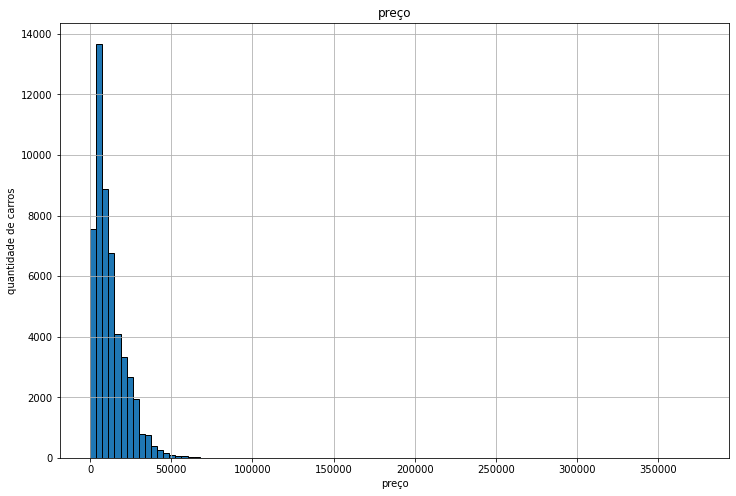

In [43]:
# visualizando o histograma

vus['price'].hist(edgecolor='black', bins=100, figsize=(12,8))

plt.ylabel('quantidade de carros')
plt.xlabel('preço')
plt.title('preço')

posso ver que o histograma em preço tem um viés de direita, a media de valores entre os carros é de 12132, porém não vemos sua máxima no histograma, mas sim, uma das barras dando passando da média de 12132 devido ao valor maximo que a puxa pra cima.


In [44]:
# descrevendo valores em 'year_listed'

vus['age'].describe()

count    51525.000000
mean         8.436429
std          6.158509
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'idade')

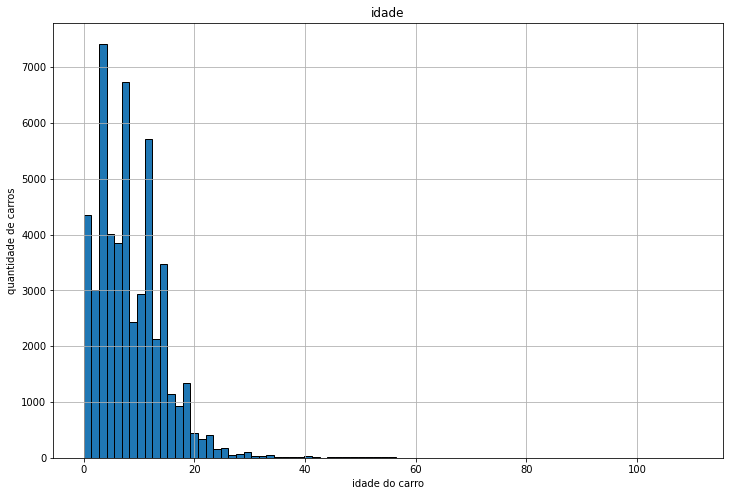

In [45]:
# visualizando o histograma

vus['age'].hist(edgecolor='black', bins = 80, figsize=(12,8))

plt.ylabel('quantidade de carros')
plt.xlabel('idade do carro')
plt.title('idade')

posso ver no histograma que de idade dos veiculos, é mais aleatório com um pequeno viés de direita. A idade media de quando alguem decide vender um carro está por volta dos 8 anos e meio, mas existe carros com até 110 anos de idade à venda.

In [46]:
# descrevendo valores em 'avg_km_year'

vus['avg_km_year'].describe()


count     51524.000000
mean       9112.599729
std        4302.348637
min           0.000000
25%        6695.000000
50%        9026.600000
75%       10933.333333
max      108888.888889
Name: avg_km_year, dtype: float64

Text(0.5, 1.0, 'km por ano')

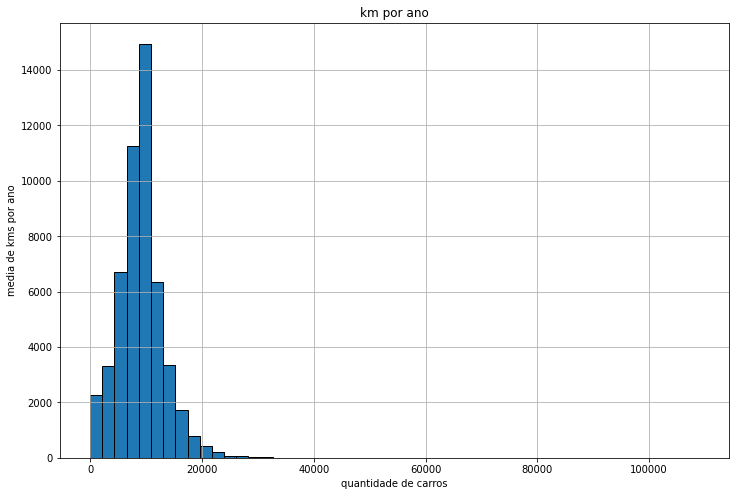

In [47]:
# visualizando o histograma

vus['avg_km_year'].hist(edgecolor='black', bins = 50,figsize=(12,8))

plt.ylabel('media de kms por ano')
plt.xlabel('quantidade de carros')
plt.title('km por ano')

quando olhamos para o histograma de km médio rodados por anos, quase com formato de sino, os dados parecem estar balanceados.

In [48]:
# descrevendo valores em 'odometer'

vus['odometer'].describe()


count     51524.000000
mean     115526.455468
std       61843.599827
min           0.000000
25%       73289.000000
50%      113703.000000
75%      151480.000000
max      990000.000000
Name: odometer, dtype: float64

Text(0.5, 1.0, 'odometro')

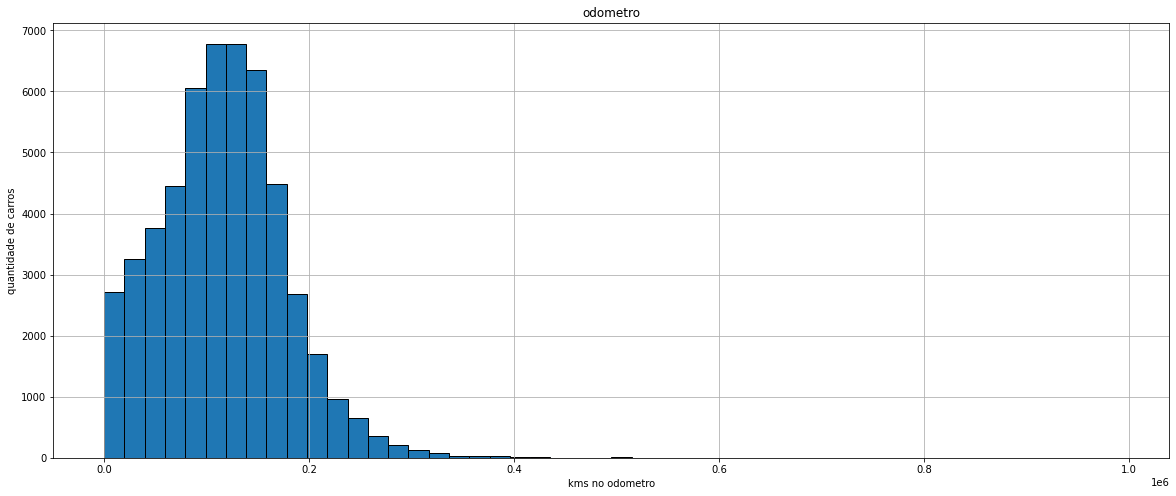

In [49]:
# visualizando o histograma

vus['odometer'].hist(edgecolor='black', bins=50, figsize=(20,8))

plt.ylabel('quantidade de carros')
plt.xlabel('kms no odometro')
plt.title('odometro')

olhando para o grafico do histograma, novamente outro gráfico com viés do esquerda, pela descrição dos dados vemos uma média de 115 mil kilometros para os carros anunciados, e uma maxima de 990 mil. há tambem carros 0km sendo vendidos, sendo q 0km se apresenta como valor minimo dessa amostra.

In [50]:
# descrevendo valores em 'cylinders'

vus['cylinders'].value_counts()



8     17712
6     17457
4     15499
10      549
5       272
3        34
12        2
Name: cylinders, dtype: int64

Text(0.5, 1.0, 'cilindros')

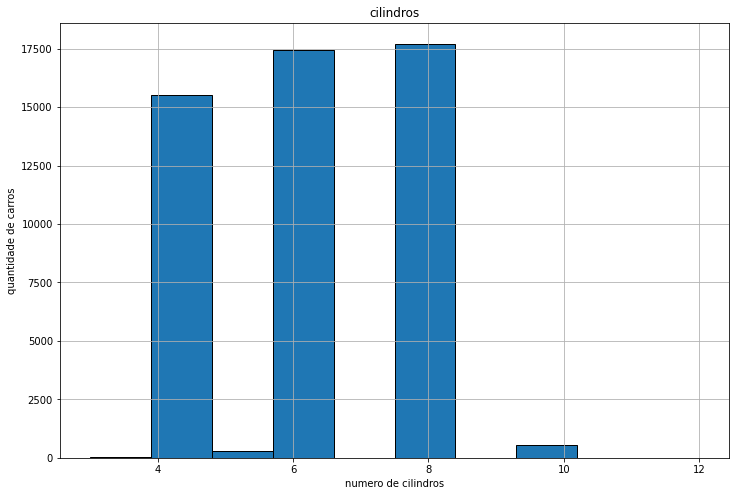

In [51]:
# visualizando o histograma
vus['cylinders'].hist(edgecolor='black', bins = 10, figsize=(12,8))
                                                            

plt.ylabel('quantidade de carros')
plt.xlabel('numero de cilindros')
plt.title('cilindros')

aqui vemos a preferencia do consumidor por carros com 8 cilindros, em segundo lugar 6 cilindros e 4 cilindros em terceiro.

In [52]:
# descrevendo valores em 'cylinders

vus['condition'].value_counts()

excellent    29515
good         20145
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

Text(0.5, 1.0, 'condição')

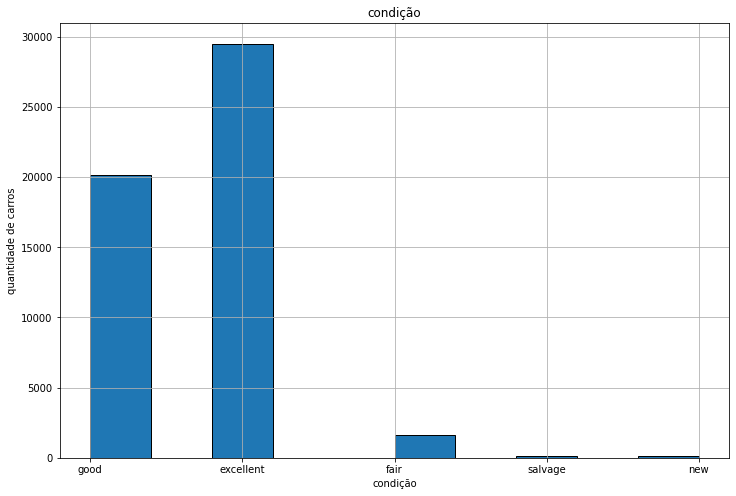

In [53]:
# visualizando o histograma

vus['condition'].hist(edgecolor='black', bins=10, figsize=(12,8))

plt.ylabel('quantidade de carros')
plt.xlabel('condição')
plt.title('condição')


podemos verificar que segundo os vendedores de carros, seus carros se encontram em excelente estado, na sequencia bom e em bem menor ocorrencia se encontram os de condição justa.

## Estude e cuide dos valores ausentes



In [54]:
# determinando quantils em 'age'


Q1a = vus['age'].quantile(0.25)
Q3a = vus['age'].quantile(0.75)

IQRa = Q3a - Q1a

In [55]:
# determinando o limite inferior para valores atípicos em 'age'

lower_bound_age = Q1a - 1.5 * IQRa
lower_bound_age = lower_bound_age  

lower_bound_age

-8.0

In [56]:
lower_bound_age = 0

In [57]:
# determinando o limite superior para valores atípicos em 'age'

upper_bound_age = Q3a + 1.5 * IQRa

upper_bound_age

24.0

In [58]:
# determinando quantils em 'odometer'

Q1o = vus['odometer'].quantile(0.25)
Q3o = vus['odometer'].quantile(0.75)

IQRo = Q3o - Q1o


In [59]:
# determinando o limite inferior para valores atípicos em 'odometer'

lower_bound_od = Q1o - 1.5 * IQRo
lower_bound_od = lower_bound_od 

lower_bound_od

-43997.5

In [60]:
lower_bound_od = 0

In [61]:
# determinando o limite superior para valores atípicos em 'odometer'

upper_bound_od = Q3o + 1.5 * IQRo

upper_bound_od

268766.5

In [62]:
# Armazenando os dados sem os valores atípicos em um DataFrame separado

vus_filtered = vus.query(
    'odometer < @upper_bound_od & odometer > @lower_bound_od & age < @upper_bound_age & age > @lower_bound_age')
    


## Estude os parâmetros fundamentais sem valores atípicos

In [63]:
# visualizando dados em 'odometer' antes de filtrar para comparação

vus['odometer'].describe()

count     51524.000000
mean     115526.455468
std       61843.599827
min           0.000000
25%       73289.000000
50%      113703.000000
75%      151480.000000
max      990000.000000
Name: odometer, dtype: float64

In [64]:
# descrevendo valores em 'odometer' no dataframe 'vus' filtrado

vus_filtered['odometer'].describe()

count     47628.000000
mean     117136.146532
std       53474.078807
min           1.000000
25%       80829.000000
50%      117000.000000
75%      151429.168182
max      268700.000000
Name: odometer, dtype: float64

<AxesSubplot:>

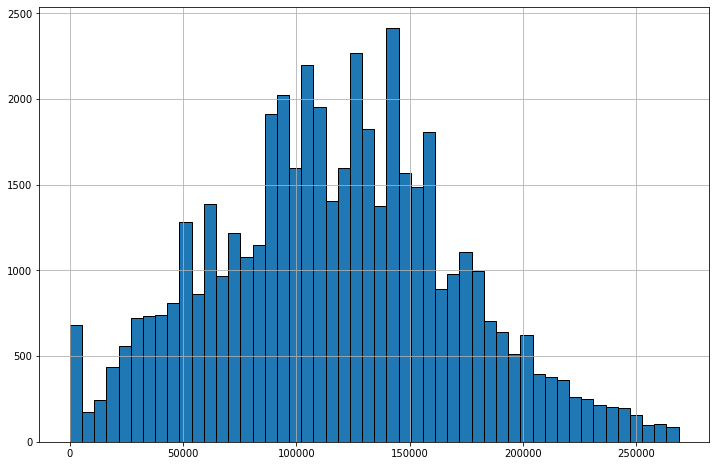

In [65]:
# visualizando histograma 'odometer'em dataframe 'vus' filtrado

vus_filtered['odometer'].hist(edgecolor='black', bins = 50, figsize=(12,8))

é possivel ver um balenceamento melhor nos dados filtrados em 'odometer' sem os seus valores atipicos. 
O valor médio da amostra filtrada aumentou em relação a amostra crua e sua médiana diminuiu.
Temos uma amostra mais eficiente para análise e teste de hipóteses.

In [66]:
# visualizando dados em 'age' antes de filtrar para comparação

vus['age'].describe()

count    51525.000000
mean         8.436429
std          6.158509
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: age, dtype: float64

In [67]:
# descrevendo valores em 'age' no dataframe 'vus' filtrado

vus_filtered['age'].describe()

count    47628.000000
mean         8.292979
std          4.917455
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max         23.000000
Name: age, dtype: float64

<AxesSubplot:>

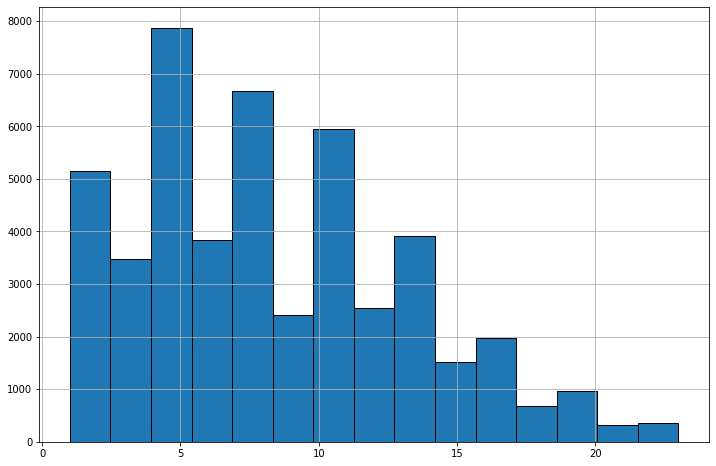

In [68]:
# visualizando histograma 'age'em dataframe 'vus' filtrado

vus_filtered['age'].hist(edgecolor='black', bins = 15, figsize=(12,8))

Vemos agora um histograma com viés de direita. Os valores de média e mediana aumentaram na amostra filtrada.
Temos uma amostra mais eficiente para a análise e teste de hipóteses.

## Tempo de vida das propagandas



In [69]:
# descrevendo 'days_listed' em 'vus'

vus['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fade658e9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fade659f0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fade658e640>],
 'medians': [<matplotlib.lines.Line2D at 0x7fade659f760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fade659fac0>],
 'means': []}

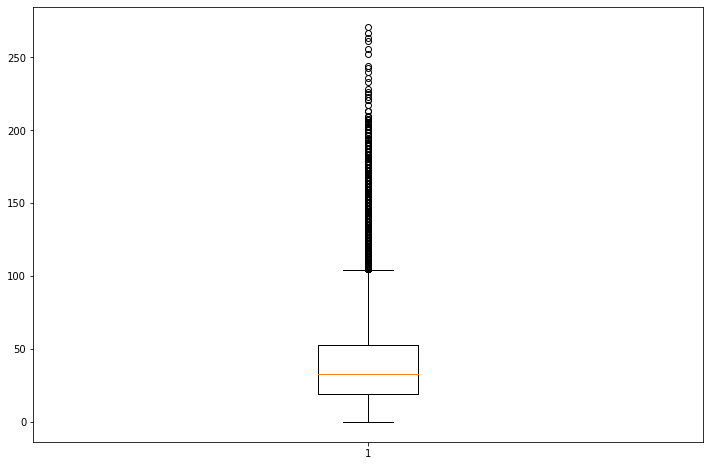

In [70]:
# visualizando boxplot de 'days_listed' em 'vus'

plt.figure(figsize=(12, 8))
plt.boxplot(vus['days_listed'])
    

In [71]:
# # determinando quantils em 'age'

Q1_dl = vus['days_listed'].quantile(0.25)

Q3_dl = vus['days_listed'].quantile(0.75)

IQR_dl = Q3_dl - Q1_dl

In [72]:
# determinando o limite inferior para valores atípicos em 'days_listed'

lower_bound_dl = Q1_dl - 1.5 * IQR_dl
lower_bound_dl = lower_bound_dl 
lower_bound_dl

-32.0

In [73]:
lower_bound_dl = 19

In [74]:
# determinando o limite superior para valores atípicos em 'days_listed'

upper_bound_dl = Q1_dl + 1.5 * IQR_dl
upper_bound_dl

70.0

In [75]:
# fatiando 'vus_filtered' apenas valores menores que variavel 'lower_bound_dl'

short_period_listed = vus.query('days_listed < @ lower_bound_dl')

In [76]:
# descrevendo fatia 'short_period_listed'

short_period_listed.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,age,avg_km_year
count,12561.000000,12561.000000,12561.000000,12561.000000,12561.000000,12561.000000,12561.000000,12561.000000
mean,12082.994666,2009.924449,6.108351,115204.855898,0.492795,11.129050,8.377518,9118.672200
std,9551.042655,6.133671,1.666395,62973.874281,0.499968,4.681681,6.148389,4560.236605
min,1.000000,1936.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,71236.000000,0.000000,8.000000,4.000000,6687.500000
50%,9000.000000,2011.000000,6.000000,113850.000000,0.000000,12.000000,7.000000,8953.000000
75%,16785.000000,2014.000000,8.000000,151442.000000,1.000000,15.000000,12.000000,10888.400000
max,140000.000000,2019.000000,10.000000,990000.000000,1.000000,18.000000,82.000000,108888.888889


In [77]:
short_period_listed['price'].describe()


count     12561.000000
mean      12082.994666
std        9551.042655
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16785.000000
max      140000.000000
Name: price, dtype: float64

Text(0, 0.5, 'Quantidade')

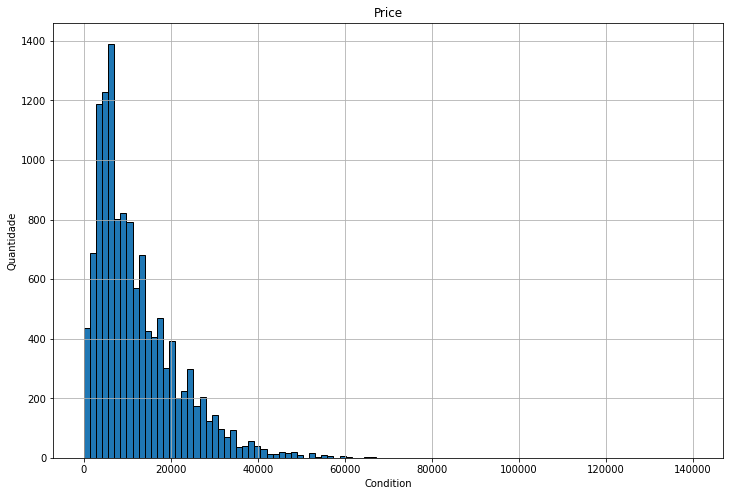

In [78]:
# plotando 'price' em 'short_period_listed'

short_period_listed['price'].hist(edgecolor='black',bins = 100, figsize=(12,8))

plt.title('Price')
plt.xlabel('Condition')
plt.ylabel('Quantidade')



* 'price' podemos ver a maior fatia de carros com valor menor que 75 mil. 

In [79]:
short_period_listed['age'].describe()

count    12561.000000
mean         8.377518
std          6.148389
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max         82.000000
Name: age, dtype: float64

Text(0, 0.5, 'Quantidade')

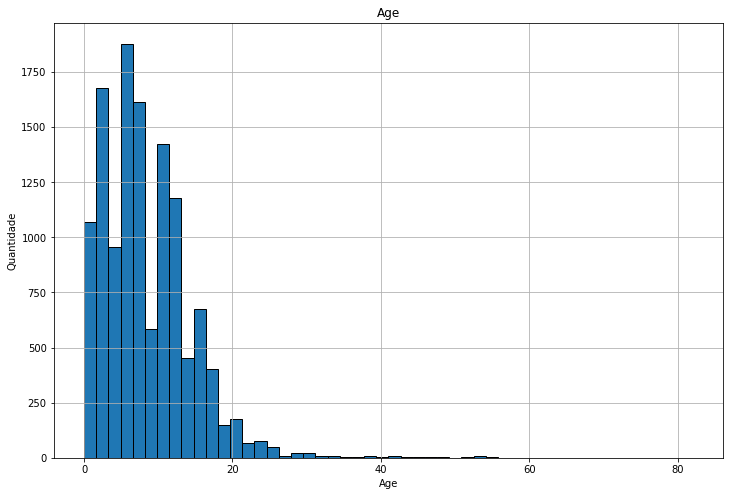

In [80]:
# plotando 'age' em 'short_period_listed'

short_period_listed['age'].hist(bins = 50, edgecolor='black', figsize=(12,8))

plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Quantidade')

* 'age' podemos ver a maior fatia de carros em menos de 10 anos

In [81]:
short_period_listed['odometer'].describe()

count     12561.000000
mean     115204.855898
std       62973.874281
min           0.000000
25%       71236.000000
50%      113850.000000
75%      151442.000000
max      990000.000000
Name: odometer, dtype: float64

Text(0, 0.5, 'Quantidade')

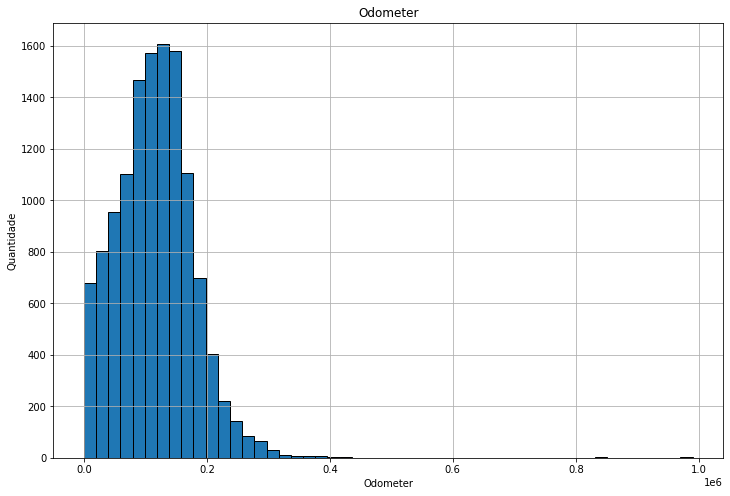

In [82]:
# plotando 'odometer' em 'short_period_listed'

short_period_listed['odometer'].hist(edgecolor='black', bins=50, figsize=(12,8))

plt.title('Odometer')
plt.xlabel('Odometer')
plt.ylabel('Quantidade')

In [83]:
short_period_listed['cylinders'].value_counts()

8     4316
6     4172
4     3864
10     136
5       66
3        7
Name: cylinders, dtype: int64

Text(0, 0.5, 'Quantidade')

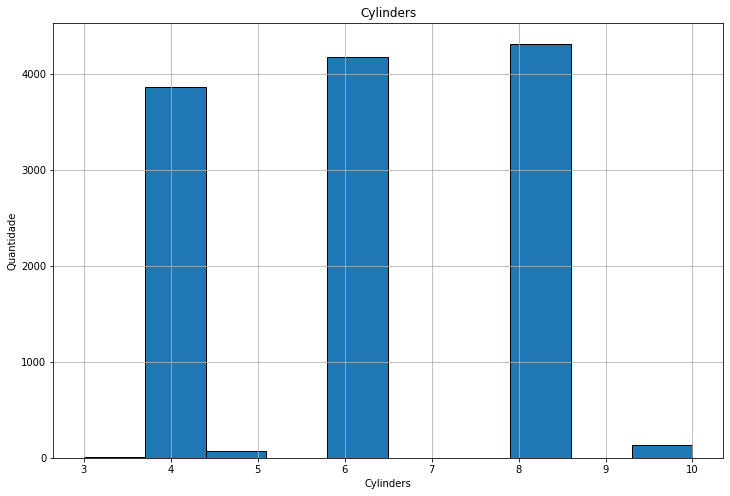

In [84]:
# plotando 'cylinders' em 'short_period_listed'

short_period_listed['cylinders'].hist(edgecolor='black', figsize=(12,8))

plt.title('Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Quantidade')

* 'cylinders' vemos que os cilindros parecem não afetar os menores valores de dias anunciados, entre v4, v6 e v8 os valores são bem parecidos


In [85]:
short_period_listed['condition'].value_counts()


excellent    7207
good         4878
fair          415
new            34
salvage        27
Name: condition, dtype: int64

Text(0, 0.5, 'Quantidade')

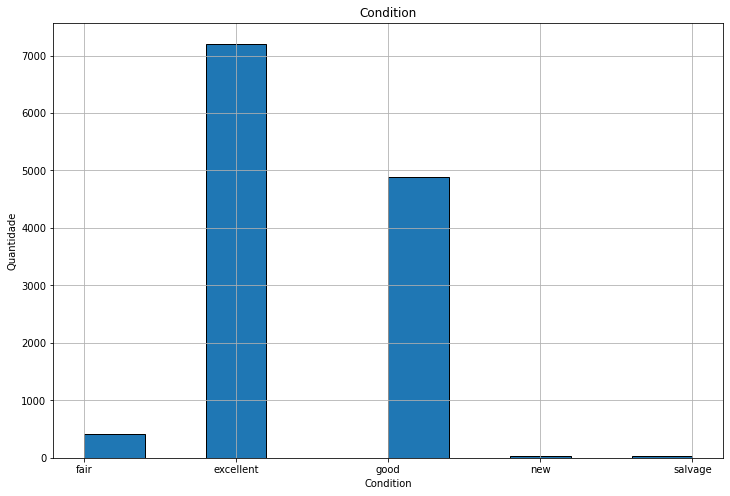

In [86]:
# plotando 'condition' em 'short_period_listed'

short_period_listed['condition'].hist(edgecolor='black',bins=10, figsize=(12,8))

plt.title('Condition')
plt.xlabel('Condition')
plt.ylabel('Quantidade')


* 'condition' a maior quantidade de carros que ficaram menos tempo anuciados eram excelentes

 **conclusoes sobre tempo de vida das propagandas**
 
 
 
    carros com valores menores que 75 mil tendem a ter tempo menor de anuncio.
    carros mais novos com menos de 20 anos tambem ficam menos tempo anunciados
    tirando carros v10, todos os outros estao bem balanceados, mostrando que o número de cilindros não afeta a escolha.
    carros com condições excelentes e boas também ficam menos tempo anunciados.

In [87]:
# fatiando 'vus' apenas valores maiores que variavel 'upper_bound_dl'

long_period_listed = vus.query('days_listed > @ upper_bound_dl')

In [88]:
# descrevendo fatia 'long_period_listed'

long_period_listed.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,age,avg_km_year
count,6729.000000,6729.000000,6729.000000,6729.000000,6729.000000,6729.000000,6729.000000,6729.000000
mean,12265.815277,2009.895081,6.144747,115576.351594,0.496508,94.670233,8.423689,9163.359304
std,10082.858241,6.192631,1.659433,60144.653291,0.500025,23.886882,6.204394,4168.909752
min,1.000000,1960.000000,3.000000,0.000000,0.000000,71.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,74000.000000,0.000000,78.000000,4.000000,6734.142857
50%,9500.000000,2011.000000,6.000000,114720.000000,0.000000,88.000000,7.000000,9153.352941
75%,16900.000000,2014.000000,8.000000,151754.000000,1.000000,104.000000,12.000000,11038.461538
max,189000.000000,2019.000000,10.000000,500000.000000,1.000000,271.000000,58.000000,64000.000000


In [89]:
long_period_listed['price'].describe()

count      6729.000000
mean      12265.815277
std       10082.858241
min           1.000000
25%        5000.000000
50%        9500.000000
75%       16900.000000
max      189000.000000
Name: price, dtype: float64

Text(0, 0.5, 'Quantidade')

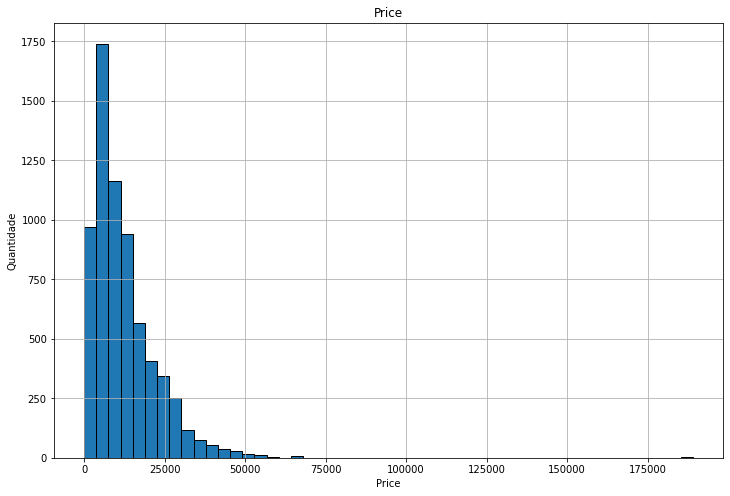

In [90]:
# plotando histogramas da fatia 'long_period_listed'

long_period_listed['price'].hist(edgecolor='black',bins = 50,  figsize=(12,8))

plt.title('Price')
plt.xlabel('Price')
plt.ylabel('Quantidade')

In [91]:
long_period_listed['age'].describe()

count    6729.000000
mean        8.423689
std         6.204394
min         0.000000
25%         4.000000
50%         7.000000
75%        12.000000
max        58.000000
Name: age, dtype: float64

Text(0, 0.5, 'Quantidade')

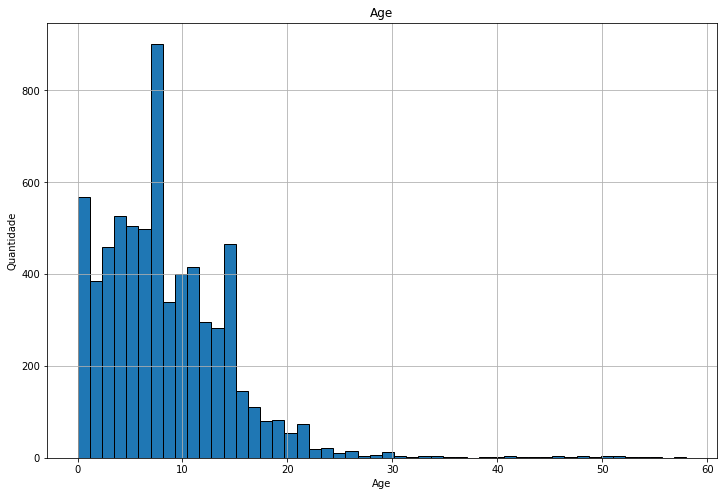

In [92]:
# plotando 'age' em 'long_period_listed'

long_period_listed['age'].hist(edgecolor='black', bins=50, figsize=(12,8))

plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Quantidade')

In [93]:
long_period_listed['odometer'].describe()

count      6729.000000
mean     115576.351594
std       60144.653291
min           0.000000
25%       74000.000000
50%      114720.000000
75%      151754.000000
max      500000.000000
Name: odometer, dtype: float64

Text(0, 0.5, 'Quantidade')

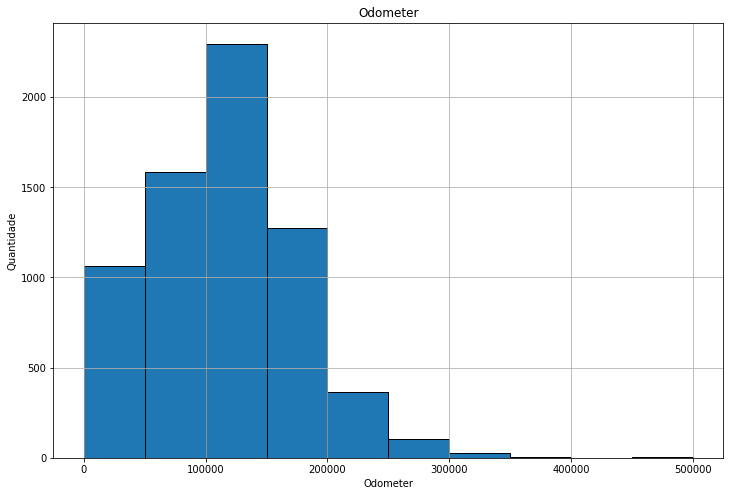

In [94]:
# plotando 'odometer' em 'long_period_listed'

long_period_listed['odometer'].hist(edgecolor='black', figsize=(12,8))

plt.title('Odometer')
plt.xlabel('Odometer')
plt.ylabel('Quantidade')

In [95]:
long_period_listed['cylinders'].describe()

count    6729.000000
mean        6.144747
std         1.659433
min         3.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        10.000000
Name: cylinders, dtype: float64

Text(0, 0.5, 'Quantidade')

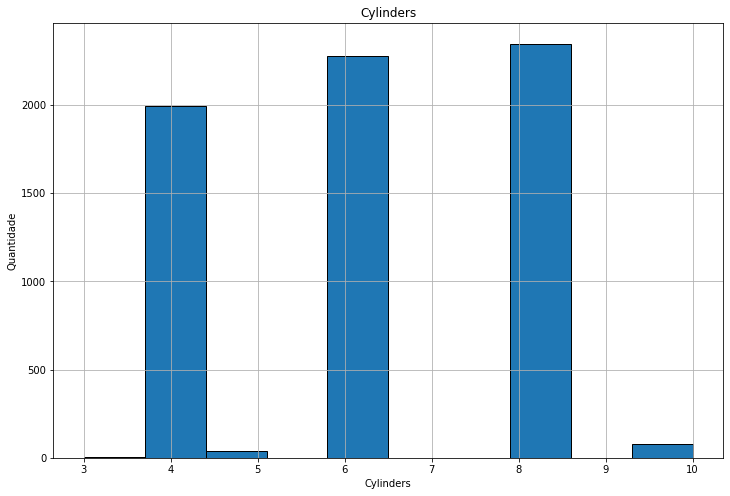

In [96]:
# plotando 'cylinder' em 'long_period_listed'

long_period_listed['cylinders'].hist(edgecolor='black', figsize=(12,8))

plt.title('Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Quantidade')

In [97]:
long_period_listed['condition'].value_counts()

excellent    3859
good         2632
fair          210
salvage        15
new            13
Name: condition, dtype: int64

Text(0, 0.5, 'Quantidade')

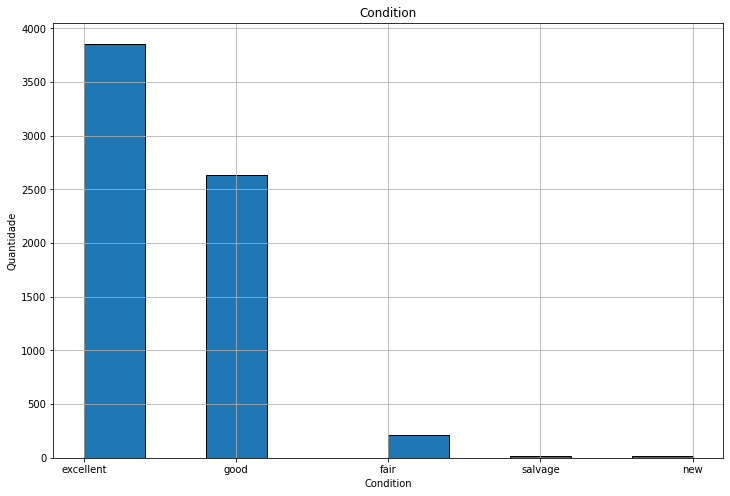

In [98]:
# plotando 'condition' em 'long_period_listed'

long_period_listed['condition'].hist(edgecolor='black', figsize=(12,8))

plt.title('Condition')
plt.xlabel('Condition')
plt.ylabel('Quantidade')

## Média de preços por cada tipo de veículo

In [99]:
# criando tabela dinamica relacao entre dias listados e preco

type_price_days = vus.pivot_table(
    index='type',values=('price','days_listed'), aggfunc='mean').sort_values(by='days_listed', ascending=False)

type_price_days.sort_values(by='days_listed', ascending = False).head(10)

,days_listed,price
type,,
bus,43.500000,17135.666667
van,40.695103,10546.941548
wagon,40.569111,9088.134328
hatchback,40.533906,6868.513849
offroad,40.397196,14292.294393
SUV,39.780895,11149.400000
sedan,39.425045,6965.358647
truck,39.409536,16734.894924
mini-van,39.399655,8193.177433


vemos que os onibus são a categoria de automóvel que ficam mais tempo anunciado é tambem o tipo que tem a maior média de preço.


In [100]:
# resetando index para poder plotar a coluna 'type'

type_price_days = type_price_days.reset_index()

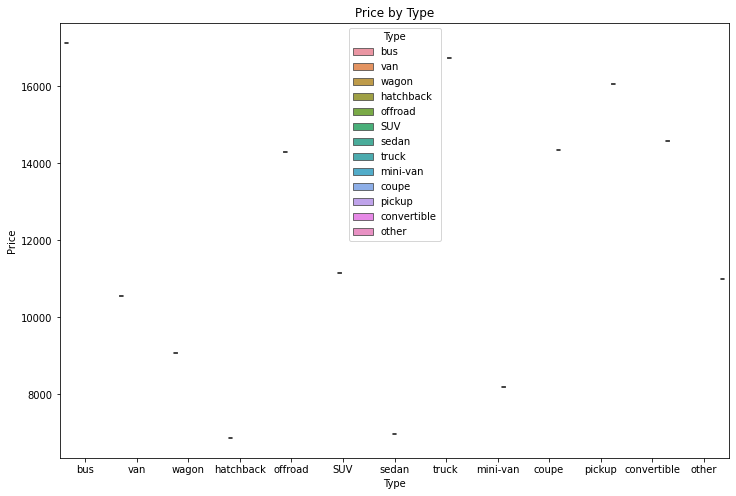

In [115]:
# plotando 'box'

plt.figure(figsize=(12, 8))
sns.boxplot(data=type_price_days, x='type', y='price', hue='type')
plt.title('Price by Type')
plt.xlabel('Type')
plt.ylabel('Price')
plt.legend(title='Type')
plt.show()

tentei usar boxplot para ver a diferença por tipo de veículo, mas o resultado não foi satisfatório.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'bus'),
  Text(1, 0, 'van'),
  Text(2, 0, 'wagon'),
  Text(3, 0, 'hatchback'),
  Text(4, 0, 'offroad'),
  Text(5, 0, 'SUV'),
  Text(6, 0, 'sedan'),
  Text(7, 0, 'truck'),
  Text(8, 0, 'mini-van'),
  Text(9, 0, 'coupe'),
  Text(10, 0, 'pickup'),
  Text(11, 0, 'convertible'),
  Text(12, 0, 'other')])

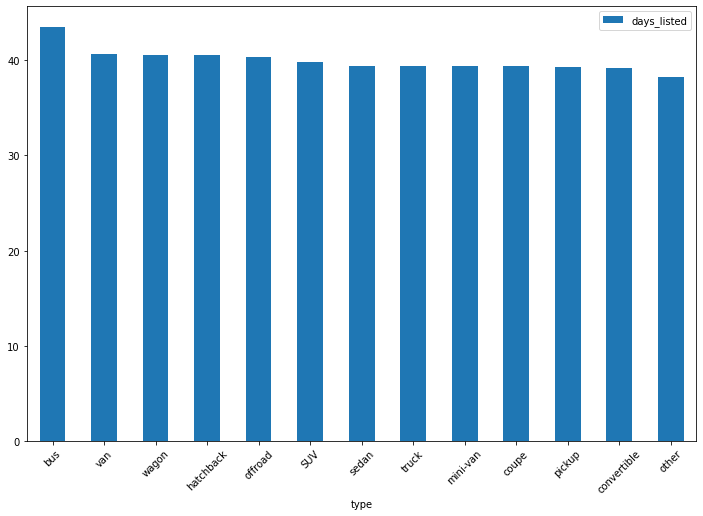

In [117]:
# visualizando o gráfico

type_price_days.plot(kind='bar', y='days_listed', x='type', figsize=(12,8))

plt.xticks(rotation=45)

os dois tipos de automóvel maior numero de tempo anunciados são onibus e vans.

In [125]:
bus_van = vus.query('type == "van" or type == "bus"')


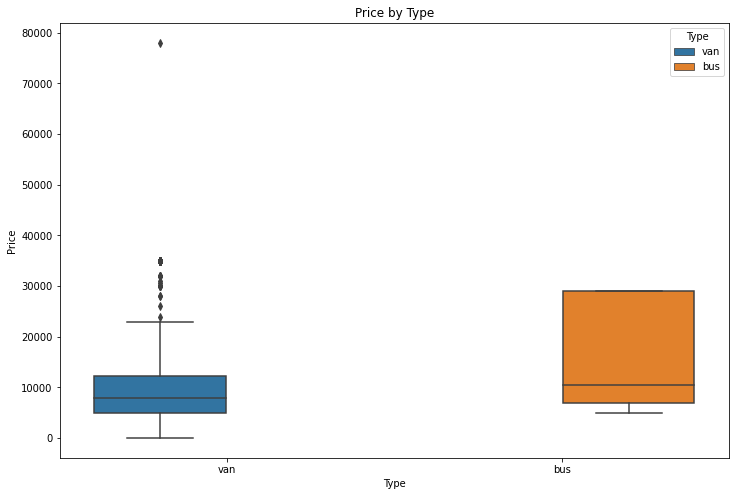

In [120]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=bus_van, x='type', y='price', hue='type')
plt.title('Price by Type')
plt.xlabel('Type')
plt.ylabel('Price')
plt.legend(title='Type')
plt.show()

visualizamos medianas similares, mas o terceiro quartil dos preços de ônibus são bem mais altos do que o dos preços de vans. Também não conseguimos verificar outliers nos preços dos ônibus.

## Fatores de preço

In [126]:
# fatiando apenas onibus e caminhos e salvando em uma variavel

bus_van = vus.query('type == "bus" or type == "van"')


bus_van

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,avg_km_year
42,34900,2013,mercedes-benz benze sprinter 2500,excellent,6,diesel,104799.348919,automatic,van,black,0,2019-01-15,16,6,10479.934892
149,13900,2016,dodge grand caravan,excellent,6,gas,62711.000000,automatic,van,black,0,2019-04-11,37,3,8958.714286
212,5995,2006,honda odyssey,excellent,6,gas,148957.320500,automatic,van,red,0,2019-04-10,33,13,8762.195324
225,9995,2013,chrysler town & country,excellent,6,gas,81999.000000,automatic,van,white,0,2019-01-07,71,6,8199.900000
369,11375,2012,toyota sienna,good,6,gas,135907.000000,automatic,van,silver,0,2018-10-03,9,6,12355.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51393,10999,2010,toyota sienna,good,6,gas,139426.000000,automatic,van,white,0,2018-08-12,13,8,10725.076923
51394,950,2005,ford f-250,fair,8,gas,174000.000000,automatic,van,white,0,2018-06-06,44,13,9666.666667
51404,9995,2009,honda odyssey,good,6,gas,68768.000000,automatic,van,white,0,2018-07-13,51,9,4912.000000
51430,11495,2015,dodge grand caravan,excellent,6,gas,100258.000000,automatic,van,white,0,2018-12-04,22,3,12532.250000


<AxesSubplot:xlabel='age', ylabel='price'>

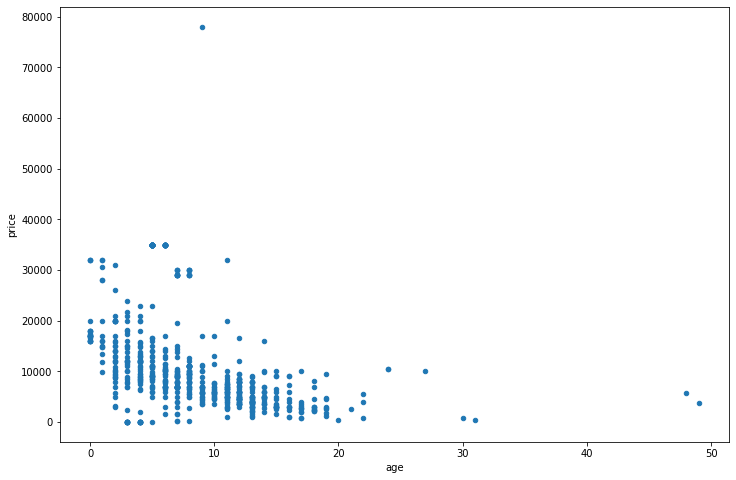

In [127]:
bus_van.plot(kind='scatter', x='age', y='price', figsize=(12,8))

podemos ver uma tendência de quanto menor a idade do carro, maior o valor.

<AxesSubplot:xlabel='odometer', ylabel='price'>

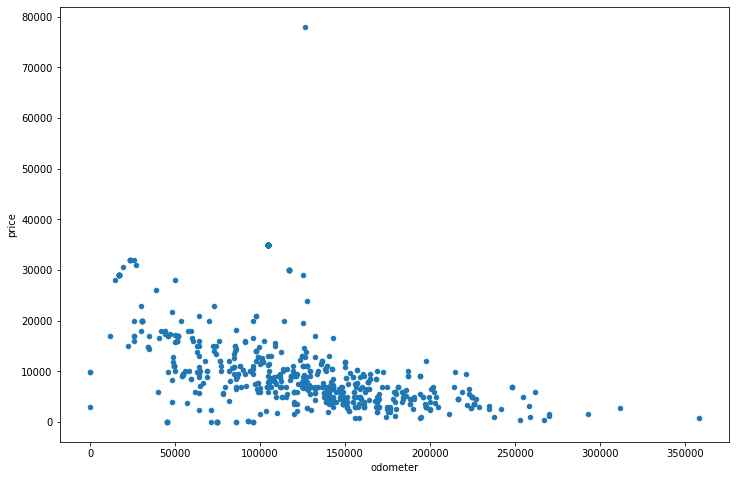

In [128]:
bus_van.plot(kind='scatter', x='odometer', y='price', figsize=(12,8))

verificamos que quanto menor a quilometragem, mais valor de mercado o carro tem

In [129]:
vus['condition'].unique()

array(['good', 'excellent', 'fair', 'salvage', 'new'], dtype=object)

In [130]:
# salvando filtro maior que 50 dias listados em variavel 'filtered_bus_truck_condition'

filtered_bus_van_condition = bus_van.query('days_listed > 50')

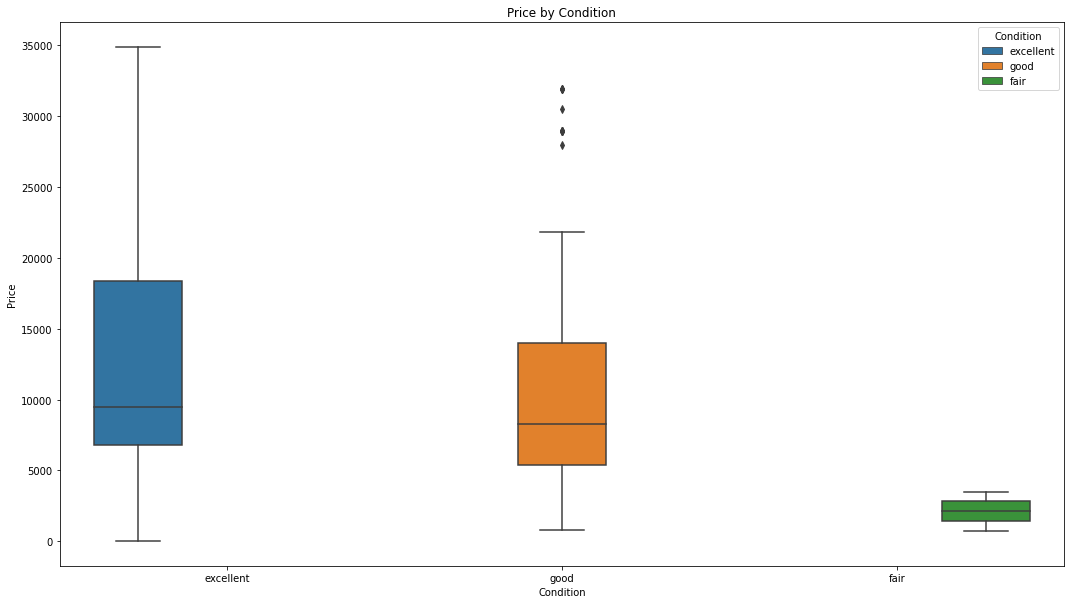

In [131]:
# plotando grafico em box para cada 'condition'

plt.figure(figsize=(18, 10))
sns.boxplot(data=filtered_bus_van_condition, x='condition', y='price', hue='condition')
plt.title('Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.legend(title='Condition')
plt.show()

é possível visualizar que a mediana para a melhor condição é maior do que estados de conservação inferiores. Ou seja, quanto melhor o estado maior o valor do veículo.

In [132]:
# salvando filtro maior que 50 dias listados em variavel 'filtered_bus_truck_paint'

filtered_bus_van_paint = bus_van.query('days_listed > 50')

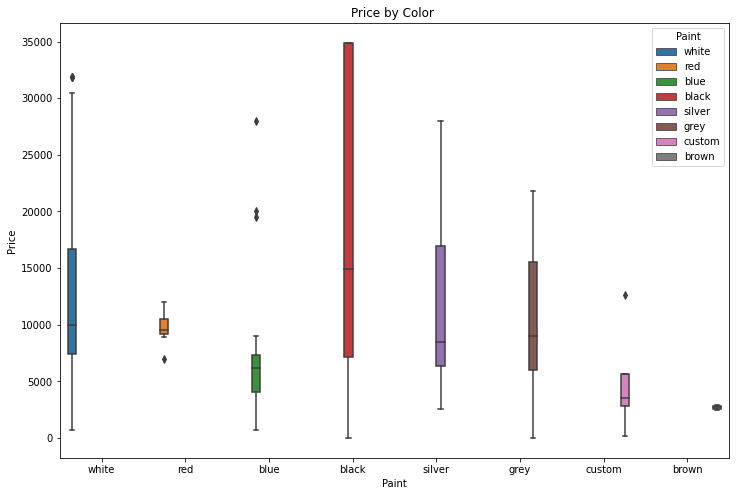

In [133]:
# plotando grafico em box para cada 'paint_color'

plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_bus_van_paint, x='paint_color', y='price', hue='paint_color')
plt.title('Price by Color ')
plt.xlabel('Paint')
plt.ylabel('Price')
plt.legend(title='Paint')
plt.show()

chamou atenção preto e branco terem as maiores medianas e vermelho têm uma mediana similar embora carros vermelhos não sejam tantos.

In [134]:
# salvando filtro maior que 50 dias listados em variavel 'filtered_bus_truck_transmission'

filtered_bus_van_transmission = bus_van.query('days_listed > 50')

filtered_bus_van_transmission.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,age,avg_km_year
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,12101.172589,2010.700508,6.558376,108982.677241,0.050761,77.101523,7.609137,9234.688632
std,9334.106746,5.036261,1.174948,51989.254159,0.220069,27.875815,5.066347,4031.294187
min,1.000000,1988.000000,4.000000,14997.000000,0.000000,51.000000,0.000000,1419.750000
25%,5995.000000,2008.000000,6.000000,68768.000000,0.000000,57.000000,4.000000,6634.782609
50%,8997.000000,2011.000000,6.000000,109705.000000,0.000000,67.000000,7.000000,9468.589334
75%,14995.000000,2014.000000,6.000000,148957.320500,0.000000,88.000000,11.000000,10674.047619
max,34900.000000,2019.000000,10.000000,241998.000000,1.000000,185.000000,30.000000,23382.142857


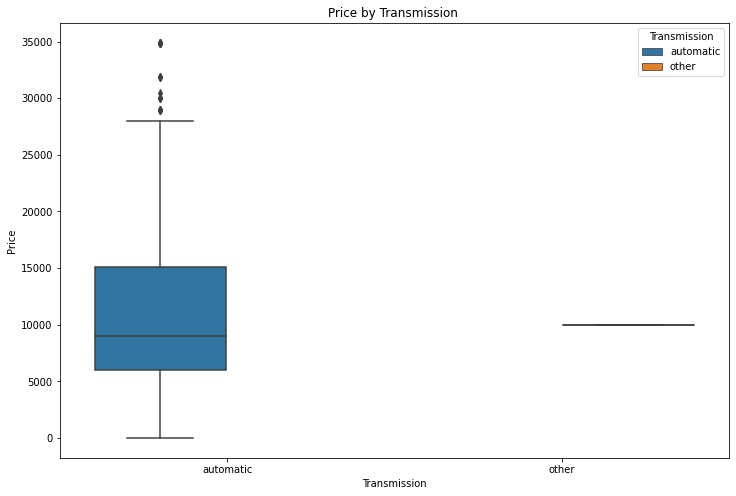

In [135]:
# plotando grafico em box para cada 'transmission'

plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_bus_van_transmission, x='transmission', y='price', hue='transmission')
plt.title('Price by Transmission ')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.legend(title='Transmission')
plt.show()

## Conclusão geral


Valores Ausentes

Os valores ausentes foram tratados.

* is_4wd escolhi por apenas substituir por 0 os valores ausentes.
* model_year escolhi por substituir os valores ausentes pela moda em relação a cada modelo.
* cylinders também escolhi por substituir os valores ausentes pela moda de cada modelo.
* odometer substitui seus valores ausentes pelas medias de cada cada model_year tendo assim uma media no odometro para carros de todos os anos, usei estes valores para substituir os valores ausentes nos correspondentes anos que tinha valor no odometro ausente.
* paint_color usei a moda entre os carros para substituir os valores ausentes.

Os dados foram enriquecidos com novas colunas para a idade que os carros tinham quandos foram anunciados, e a quilometragem media por ano. Posteriormente essas colunas tiveram valores cruciais para a análise.

Primeiramente estudamos os parâmetros fundamentais dos dados.

* Preço, pudemos verificar que o valor médio dos carros fica em torno dos 12 mil, a maioria dos valores ficam entre 5 mil e quase 17 mil, mesmo assim, encontramos carros com valores de até 325 mil.
* A idade do veículo quando a propaganda foi colocada, a idade média verificada em torno de 8 ano e meio, carros entre  4 e 12 anos são maioria.
* Quilometragem, a media de quilometros rodados por carro anuncioado fica pouco acima dos 9 mil kms
* Número de cilindros, vimos a preferencia do consumidor por carros com 8 cilindros, em segundo lugar 6 cilindros e 4 cilindros em terceiro.
* Odometro, média de 115 mil quilometros indica quantos quilometros em média os carrso tem quando são anunciados.
* Condição, carros com condição excelente e boa são a grande maioria.

Tratamos valores atípicos dentro dos dados e os observamos novamente.

* Quilometragem, o valor médio da amostra filtrada aumentou em relação a amostra crua e sua médiana diminuiu
* Idade do veiculo, os valores de média e mediana aumentaram na amostra filtrada.

Estudamos quanto tempo uma propaganda fica publicada e o que pode afetar o tempo. 

Dentre os anuncios que tiveram pouco tempo de publicação, ou seja, menor que 19 dias.
Vemos

* Preço, a media e os valores entre os quartis continuam similares aos anteriores a fatia que ficaram menos tempo publicados.
* Idade, a media de idade caiu, o que pode indicar que carros mais novos podem ficar menos tempo anunciado.
* Odometer, encontramos numeros muitos similares aos anteriores.
* Cilindros, verificamos a mesma tendência.
* Condição, vemos a mesma tendência de carros com nível de conservação melhor em maior quantidade.


Dentre os anuncios que tiveram maior tempo de publicação, ou seja, maior que 70 dias.
Vemos


* Preço, pequena variação em relação ao corte anterior e seu valor original.
* Idade, a média de idade subiu novamente em relação ao corte anterior.
* Odometer, novamente os valores não se alteraram muito comparados com os anteriores.
* Cilindros, os que ficaram mais tempo ainda são os 8 cilindros.
* Condição, os que ficaram por mais tempo ainda são os excelentes.

Podemos concluir aqui que pelos dados, que a idade parece ser o fator que mostra alguma mudança mais significativa em relação a mudança de outros dados, dentro das fatias de publicidades com mais ou menos tempo publicadas.

Analisamos o número de propagandas e o preço médio para cada tipo de veículo. Verificamos que os veículos que mais publicados são onibus e vans. Os ônibus cabeçam a lista média com 43 dias, e a variação do segundo colocado em relação aos outros tipos de carro é menos de 1 dia.

Quando analisamos o preços entre os dois tipos de veículos mais vendidos, vemos que os ônibus tem valores menos exorbitantes por não possuir outliers. Mesmo que as vans tenhas seus valores medianos similares aos dos onibus, é possível ver que existem vans com valores mais altos do que o normal.

Quando estudamos os fatores que impactam o preço do veiculos, vimos

* Preço x Idade, vimos uma tendência do veículo mais nvo ter o valor mais alto
* Preço x Odometro, também vemos claramente uma tendência ao veículo com menor quilometragem ter um valor mais alto.
* Preço x Condição, foi possível ver que veículos com condição melhor também tem valores mais altos quando anunciados.
* Preço x Cor da Pintura, o carros da cor preta tem valores mais altos entre as cores, seguidos por branco, prata e cinza, quase no mesmo nível, chamou atenção que veículos da cor vermelha, embora em menos quantidade, tem seu valor mediano similar com os veículos branco, prata e cinza. O marrom e a cor customizada dentre todas as cores, mostram valor menor quando anunciados.
* Preço x Transmissão, dentro da fatia de veículos, como ônibus e vans, não possuem veículos manuais.

Finalmente, podemos dizer que, conforme a melhor condição de carro, menor idade do veículo afetam os preços dos carros mais para cima. Quanto menor o tempo de vida do carro, menor a sua quilometragem, logo, são diretamente proporcionais.
A cor que mais valoriza o preço do carro é preto. O tipo de transmissão não parece infuenciar nos valores do carro, apesar de se ter notado uma preferência por carros automaticos nos anúncios, se considerarmos a amostra dos anúncios como uma amostra geral de preferência do consumidor.
















